Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Кількість рядків: 8704
Кількість стовпців: 25


N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                

<ipython-input-7-e7e8a594263c>:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_salaries = grouped.apply(fill_avg_salary).reset_index(name='avg')


df збережено у файл 'salary_data_new.csv'.


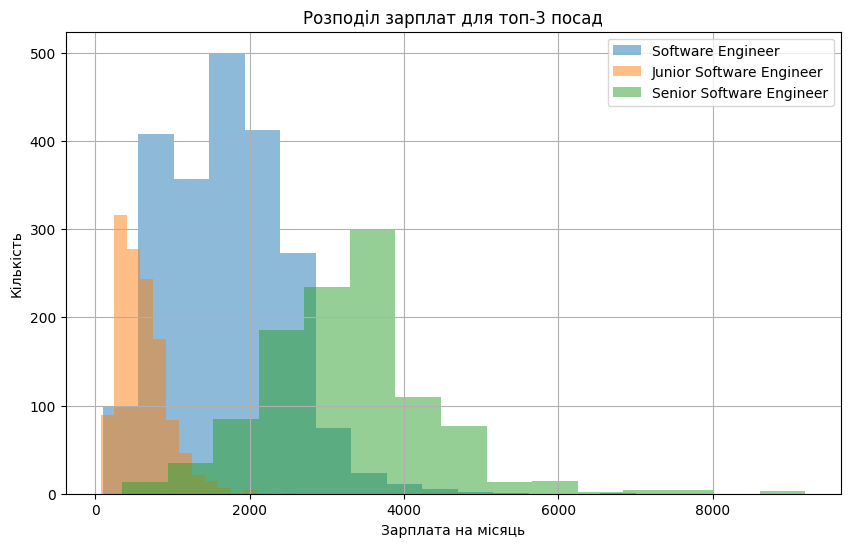

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/2017_jun_final.csv'

df = pd.read_csv(file_path)

df.head()

rows, columns = df.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")
print('\n')
print(df.dtypes)
print('\n')
missing_counts = df.isnull().sum() #Кількість пропусків у кожній колонці
total_rows = len(df)
missing_fraction = (df.isnull().sum() / total_rows) * 100
print("Частка пропусків у кожній колонці (%):")
print(missing_fraction)
print('\n')
columns_with_missing = missing_counts[missing_counts > 0].index
column_to_keep = "Мова програмування"
columns_to_drop = [col for col in columns_with_missing if col != column_to_keep]
df = df.drop(columns=columns_to_drop)
print("Оновлений список:")
print(df.head())
print('\n')
missing_counts = df.isnull().sum() #Кількість пропусків у кожній колонці
total_rows = len(df)
missing_fraction = (df.isnull().sum() / total_rows) * 100
print("Частка пропусків у кожній колонці (%):")
print(missing_fraction)
print('\n')
df = df.dropna()
rows, columns = df.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")
print('\n')
python_data = df[df['Мова програмування'] == 'Python']
rows, columns = python_data.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")
print('\n')

grouped = df.groupby('Посада')
print(grouped.groups)

print('\n')
aggregation = grouped['Зарплата на місяць'].agg(['min', 'max'])
print("Агрегація за min max значеннями:")
print(aggregation)
print('\n')
def fill_avg_salary(df):
    if 'Зарплата на місяць' in df.columns:
        return df['Зарплата на місяць'].mean()

avg_salaries = grouped.apply(fill_avg_salary).reset_index(name='avg')
df = df.merge(avg_salaries, on='Посада', how='left')
print(df)
print('\n')
statistics = df['avg'].describe()
print(statistics)
print('\n')
df.to_csv('salary_data_new.csv', index=False, encoding='utf-8')
print("df збережено у файл 'salary_data_new.csv'.")

import matplotlib.pyplot as plt

top_3_positions = df['Посада'].value_counts().nlargest(3).index
df_top3 = df[df['Посада'].isin(top_3_positions)]

plt.figure(figsize=(10,6))

for pos in top_3_positions:
    subset = df_top3[df_top3['Посада'] == pos]
    plt.hist(subset['Зарплата на місяць'], bins=15, alpha=0.5, label=pos)

plt.title('Розподіл зарплат для топ-3 посад')
plt.xlabel('Зарплата на місяць')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()




